# Experiment Analysis Area Of Patterns Retained using One Hot Encoding
In this notebook we will evaluate the results form the experiments executed. For each experiment, one parameter is changed and all others were kept constant as to determine the effect of one variable. 

**The goals of this analysis are:**
1. Determine the relationship of the number of parameters in the neural network and Area of the patterns that can be retained 
2. Investigate which activation function lead to the retention of Area
3. Determine what effect bidirectional RNNs has on this relationship
4. Determine the effect of increasing the number of layers has on Area retention

To determine whether a relationshop exists between the variable being investigated and the number of required parameters in each respective neural network, the Pearson correlation coefficient is used. The domain of this metric lies between -1 and +1 or in mathematical notation $P \in [-1, 1]$. If there exists a strong positive relationship between variables, the Pearson coefficient will approach +1 and for the negative case -1. 

In [1]:
import pandas as pd 
import numpy as np
import scipy
import sklearn
import pandas as pd
from sqlalchemy import Column, Integer, String
from sqlalchemy import create_engine, Column
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Pattern Area Analysis

In [5]:
! wc -l /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/100_0_False_volume_experiment.log

411 /home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/100_0_False_volume_experiment.log


In [7]:
LSTM="lstm"
ELMAN_RNN="elman"
JORDAN_RNN="jordan"
GRU="gru"
BIDIRECTIONAL_RNN="bidirelamn"
BIDIRECTIONAL_LSTM="bidirlstm"
BIDIRECTIONAL_GRU="bidirgru"

def determine_model_parameters(row):
    nodes_in_layers = eval(row["nodes_in_layer"])
    nn_type = row["nn_type"]
    if nn_type == BIDIRECTIONAL_RNN:
        return sum(nodes_in_layers) * 6
    if nn_type == BIDIRECTIONAL_GRU:
        return sum(nodes_in_layers) * 21
    if nn_type == BIDIRECTIONAL_LSTM:
        return sum(nodes_in_layers) * 24
    if nn_type == LSTM:
        return sum(nodes_in_layers) *12
    if nn_type == GRU:
        return sum(nodes_in_layers) *9
    return sum(nodes_in_layers) * 3


In [22]:
df = pd.read_csv("/home/danielp/Documents/Masters/Code/memory_capacity_retention_rnns/danny_masters/100_0_False_volume_experiment.log", delimiter=";")
df["nn_type"] = df["nn_type"].apply(lambda x: x.replace("INFO:root:", "")) 
df["diff_small_large"] = df["smallest_not_retained"] - df["largest_retained"]
df["diff_small_large_len"] =  df["largest_len_retained"] - df["Unnamed: 6"]
df["model_params"] = df.apply(lambda row: determine_model_parameters(row), axis=1)
df["nodes_in_layer"] = df["nodes_in_layer"].apply(eval)
df["area"] = df["largest_retained"] * df["Unnamed: 6"]

# df = df[(df["diff_small_large"]  == 0) & (df["diff_small_large_len"]  == 1)]
df

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area
0,lstm,softmax,504,[42],1,12,8,0,"{'val_loss': [3.807293176651001], 'loss': [3.8...",1.0,504,NaN,NaN,NaN,11,-8,8
1,lstm,elu,504,[42],1,12,8,0,"{'val_loss': [3.609874963760376], 'loss': [3.7...",1.0,504,NaN,NaN,NaN,11,-8,8
2,lstm,elu,504,[42],1,14,8,0,"{'val_loss': [14.46240234375], 'loss': [14.942...",1.0,504,NaN,NaN,NaN,13,-8,8
3,lstm,elu,504,[42],1,18,8,0,"{'val_loss': [63.046478271484375], 'loss': [64...",1.0,504,NaN,NaN,NaN,17,-8,8
4,lstm,elu,504,[42],1,8,8,8,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [63.046478271484375], 'loss': [64...",1.0,NaN,7,0,8
5,lstm,elu,504,[42],2,20,2,699,"{'val_loss': [2.2484652996063232, 2.0748842954...",0.75,504,NaN,NaN,NaN,18,697,4
6,lstm,elu,504,[42],2,21,2,0,"{'val_loss': [0.8614286780357361], 'loss': [0....",1.0,504,NaN,NaN,NaN,19,-2,4
7,lstm,elu,504,[42],2,8,1,2,found,<keras.engine.training.Model object at 0x7fbb8...,504,"{'val_loss': [0.8614286780357361], 'loss': [0....",1.0,NaN,6,1,2
8,lstm,elu,504,[42],4,40,2,699,"{'val_loss': [1.6602900624275208, 1.4926756024...",0.625,504,NaN,NaN,NaN,36,697,8
9,lstm,elu,504,[42],4,41,2,0,"{'val_loss': [0.88064906001091], 'loss': [0.93...",1.0,504,NaN,NaN,NaN,37,-2,8


In [23]:
df[(df["nn_type"] == "bidirlstm") & (df[(df["nn_type"] == "bidirlstm")]["largest_retained"] == df[(df["nn_type"] == "bidirlstm")]["largest_retained"].max())]

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area


In [24]:
df[(df["diff_small_large"]  == 1) & (df["parameters"]==504)]

,nn_type,activation_func,parameters,nodes_in_layer,largest_retained,smallest_not_retained,Unnamed: 6,largest_len_retained,smallest_len_not_retained,status,model_params,num_epochs,model_score,highest_F1,diff_small_large,diff_small_large_len,area


## 1. Number of parameters $\varpropto$ pattern length
#### Relationship of the number of parameters in network to length of patterns retained 

### Overall

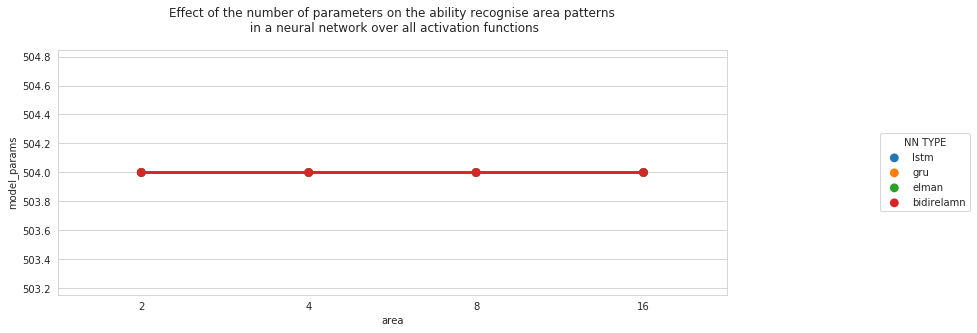

In [25]:
from matplotlib import pyplot
def plot_by_filter(x_col, 
                   y_col, 
                   x_label='Sparsity length',
                   y_label='Number of network parameters',
                   title="Effect of sparsity on the number of parameters \n in a neural network with activation ", 
                   hue="network_type", 
                   filter_col="activation_function", 
                   filter_val="tanh",
                   legend_title="NN TYPE",
                  df=None):
    sns.set_style("whitegrid")
    a4_dims = (12, 4.5)
    fig, ax = pyplot.subplots(figsize=a4_dims)
    ax.set(xlabel=x_label, 
       ylabel=y_label )
    if filter_val is not None:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  markersize=5, ci=None,
                          data = df[df[filter_col] == filter_val])
       
        ax.axes.set_title(title + filter_val,
                          fontsize=12, y=1.05)
        ax.legend(title=filter_val.upper(), loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)
    else:
        ax = sns.pointplot(ax=ax, x=x_col, y=y_col, hue=hue, 
                          marker='o',  markersize=5, ci=None,
                          data = df)
        ax.axes.set_title(title, fontsize=12, y=1.05)
        ax.legend(title=legend_title, loc='center right', bbox_to_anchor=(1.37, 0.5), ncol=1)

    # plt.legend()
filter_col = "nn_type"
filter_1 = "area"
x_col = "area"
x_label = "Area of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label="Area of pattern retained",
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability recognise area patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="nn_type",
              filter_col=filter_col, filter_val=None, df=df)    

### Correlation

In [26]:
filter_col = "nn_type"
filter_col_1 = x_col
for filter_val in df[filter_col].unique():
    df_temp = df[df[filter_col] == filter_val]
    df_temp = df_temp.groupby([x_col, "nn_type"]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[x_col] = df_temp[x_col].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print("Pearson Correlation Between "+x_label+" length and Number of Network Parameters for", filter_val, df_temp[x_col].corr(df_temp["model_params"]))

Pearson Correlation Between Area of Patterns length and Number of Network Parameters for lstm nan
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for gru nan
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for elman nan
Pearson Correlation Between Area of Patterns length and Number of Network Parameters for bidirelamn nan


### Pattern Length retention

In [28]:
df_cap = df.groupby(["nn_type"]).agg({"model_params" : "sum", "area": "sum"})
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
df_cap

,model_params,area,capacity_ratio
nn_type,,,
bidirelamn,12096,218,0.018022
elman,68544,1344,0.019608
gru,66024,1074,0.016267
lstm,59976,980,0.016340


## 2. Investigate which activation function lead to the highest retention of length of pattern

In [29]:
filter_col = "activation_func"
filter_col_1 = x_col
for filter_val in df[filter_col].unique():
    df_temp = df[(df[filter_col] == filter_val)]
    df_temp = df_temp.groupby([filter_col_1]).agg({"model_params": "mean"}).to_records()
    df_temp = pd.DataFrame.from_records(df_temp)
    df_temp[filter_col_1] = df_temp[filter_col_1].astype(float)
    df_temp["model_params"] = df_temp["model_params"].astype(float)
    
    print("Pearson Correlation Between "+x_label+" and Number of Network Parameters for", filter_val, df_temp[filter_col_1].corr(df_temp["model_params"]))

Pearson Correlation Between Area of Patterns and Number of Network Parameters for softmax nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for elu nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for selu nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for softplus nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for softsign nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for tanh nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for sigmoid nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for hard_sigmoid nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for relu nan
Pearson Correlation Between Area of Patterns and Number of Network Parameters for linear nan


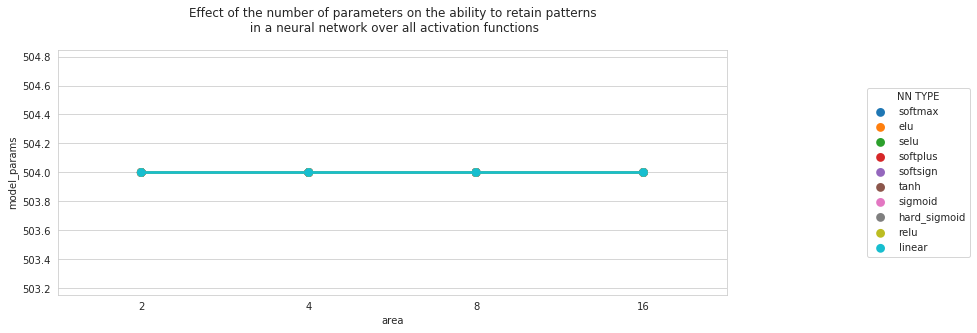

In [30]:
filter_col = "activation_func"
filter_1 = "area"
x_col = "area"
x_label = "Number of Patterns"
plot_by_filter(x_col=x_col, 
               y_col="model_params",
               x_label=x_label,
               y_label='Number of network parameters',
               title="Effect of the number of parameters on the ability to retain patterns" + 
                       "\n in a neural network over all activation functions", 
               hue="activation_func",
              filter_col=filter_col, filter_val=None, df=df)    

### Correlation of activation functions  ∝ length of pattern

In [10]:
df[filter_col].unique()

array(['elu', 'selu', 'softplus', 'softsign', 'tanh', 'sigmoid',
       'hard_sigmoid', 'relu', 'linear', 'softmax'], dtype=object)

In [31]:
filter_col = "activation_func"
df_correlation_matrix = pd.DataFrame(columns=df["nn_type"].unique())
df_correlation_matrix["activation_func"] = df[filter_col].unique()
df_correlation_matrix.index =  df_correlation_matrix["activation_func"]
del df_correlation_matrix["activation_func"]
for filter_val in df[filter_col].unique():
    for filter_val_1 in df["nn_type"].unique():
        df_temp = df[(df["nn_type"] == filter_val_1) & (df["activation_func"] == filter_val)]
        df_temp = df_temp.groupby(["area"]).agg({"model_params": "mean"}).to_records()
        df_temp = pd.DataFrame.from_records(df_temp)
        df_temp[x_col] = df_temp[filter_col_1].astype(float)
        df_temp["model_params"] = df_temp["model_params"].astype(float)
        df_correlation_matrix.at[filter_val, filter_val_1] =   df_temp[filter_col_1].corr(df_temp["model_params"])
        print("Pearson Correlation Between "+x_label+" and Number of Network Parameters for", filter_val_1 + " "+ filter_val, df_temp[filter_col_1].corr(df_temp["model_params"]))

Pearson Correlation Between Number of Patterns and Number of Network Parameters for lstm softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for gru softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for elman softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for bidirelamn softmax nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for lstm elu nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for gru elu nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for elman elu nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for bidirelamn elu nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for lstm selu nan
Pearson Correlation Between Number of Patterns and Number of Network Parameters for gru selu nan
P

/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:2522: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
/usr/local/lib/python3.5/dist-packages/numpy/lib/function_base.py:2451: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [32]:
df_correlation_matrix

,lstm,gru,elman,bidirelamn
activation_func,,,,
softmax,NaN,NaN,NaN,NaN
elu,NaN,NaN,NaN,NaN
selu,NaN,NaN,NaN,NaN
softplus,NaN,NaN,NaN,NaN
softsign,NaN,NaN,NaN,NaN
tanh,NaN,NaN,NaN,NaN
sigmoid,NaN,NaN,NaN,NaN
hard_sigmoid,NaN,NaN,NaN,NaN
relu,NaN,NaN,NaN,NaN


### Sequence Length Capacity

In [34]:
df_cap = df.groupby(["nn_type", "activation_func"]).agg({"model_params" : "sum", "area": "sum"})
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
df_cap = pd.DataFrame(df_cap.to_records())
df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

nn_type,bidirelamn,elman,gru,lstm
activation_func,,,,
elu,0.020924,0.022109,0.022109,0.015568
hard_sigmoid,NaN,0.015568,0.015568,0.015568
linear,NaN,0.022109,0.015568,0.015568
relu,NaN,0.022109,0.015568,0.015568
selu,NaN,0.022109,0.015568,0.022109
sigmoid,NaN,0.015568,0.015568,0.015568
softmax,0.015568,0.015568,0.015568,0.015873
softplus,NaN,0.015568,0.015568,0.015568
softsign,NaN,0.022109,0.015568,0.015568


            # TOTOTOTOTOTODOODODODODOODODODO

## 3. Relationship between the length of pattern and number of layers

In [35]:
df["num_layers"] = df["nodes_in_layer"].apply(len)
df.groupby(["num_layers", "model_params"]).agg({"area": "mean"})

,,area
num_layers,model_params,
1,504,8.819512


In [37]:
df_cap = df.groupby(["nn_type", "activation_func", "num_layers"]).agg({"model_params" : "sum", "area": "sum"})
df_cap = pd.DataFrame(df_cap.to_records())
df_cap["capacity_ratio"] = df_cap["area"]/df_cap["model_params"]
# df_cap = df_cap.pivot(index="activation_func", columns="nn_type", values="capacity_ratio")
df_cap

,nn_type,activation_func,num_layers,model_params,area,capacity_ratio
0,bidirelamn,elu,1,5544,116,0.020924
1,bidirelamn,softmax,1,6552,102,0.015568
2,elman,elu,1,7056,156,0.022109
3,elman,hard_sigmoid,1,6552,102,0.015568
4,elman,linear,1,7056,156,0.022109
5,elman,relu,1,7056,156,0.022109
6,elman,selu,1,7056,156,0.022109
7,elman,sigmoid,1,6552,102,0.015568
8,elman,softmax,1,6552,102,0.015568
9,elman,softplus,1,6552,102,0.015568


#### Num layers = 1

In [38]:
df_cap[df_cap["num_layers"] == 1].pivot(index="activation_func", columns="nn_type", values="capacity_ratio")

nn_type,bidirelamn,elman,gru,lstm
activation_func,,,,
elu,0.020924,0.022109,0.022109,0.015568
hard_sigmoid,NaN,0.015568,0.015568,0.015568
linear,NaN,0.022109,0.015568,0.015568
relu,NaN,0.022109,0.015568,0.015568
selu,NaN,0.022109,0.015568,0.022109
sigmoid,NaN,0.015568,0.015568,0.015568
softmax,0.015568,0.015568,0.015568,0.015873
softplus,NaN,0.015568,0.015568,0.015568
softsign,NaN,0.022109,0.015568,0.015568


#### Num layers = 2

In [39]:
df_cap[df_cap["num_layers"] == 2].pivot(index="activation_func", columns="nn_type", values="capacity_ratio")

nn_type
activation_func


### Conclusion about capacity?